Используем набор данных Ames Housing,
который рассматривался на первых лекциях.


In [ ]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

# выбор темы картинок
matplotlib.style.use('ggplot')


# графическая библиотека
import seaborn as sns
#  Эта строчка нужна для того, чтобы картинки отображались в ячейках
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [ ]:
AH = pd.read_csv('/content/sample_data/AmesHousing.txt', sep="\t", header = 0, index_col=False)
AH

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [ ]:
AH.head(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,189000


In [ ]:
#  Размеры таблицы данных
print(AH.shape)
#  Число строк в таблице данных
print(len(AH))

(2930, 82)
2930


Сравниваем цены домов (SalePrice) в двух группах.
Группы определяются по значениям количественных переменных,
то есть по переменным из списка, определенного командой
AH.describe(include=[np.number]).

In [ ]:
#  Описательные статистики для
#  переменных в количественной шкале
AH.describe(include=[np.number])


,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000



Для примера используем переменную площадь дома (Gr Liv Area).
Группы определяются условием
значение переменной Gr Liv Areaбольше медианы или
значение переменной Gr Liv Area меньше медианы.

In [ ]:
AH=AH[['SalePrice', 'Gr Liv Area']]

In [ ]:
median = AH['Gr Liv Area'].median()
median

1442.0

In [ ]:
x = AH[AH['Gr Liv Area'] < median]['SalePrice']
y = AH[AH['Gr Liv Area'] >= median]['SalePrice']
x.name, y.name = 'first_group', 'second_group'

In [ ]:
x

1       105000
2       172000
6       213500
7       191500
11      185000
         ...  
2924    131000
2925    142500
2926    131000
2927    132000
2928    170000
Name: first_group, Length: 1463, dtype: int64

In [ ]:
y

0       215000
3       244000
4       189900
5       195500
8       236500
         ...  
2910    151400
2912    146500
2921    150900
2922    188000
2929    188000
Name: second_group, Length: 1467, dtype: int64

Если распределение хотя бы одной выборки существенно отличается от нормального, в качестве центра предлагается использовать медиану.


В остальных случаях, то есть если распределение каждой выборки можно считать
нормальным или несущественно отличающимся от нормального, в качестве центра предлагается использовать среднее арифметическое.

(array([  2.,   0.,   3.,   3.,   4.,   8.,  20.,  15.,  36.,  51.,  47.,
         54.,  95.,  89., 141., 151., 137., 139.,  96.,  82.,  62.,  57.,
         49.,  33.,  17.,  20.,  19.,  10.,   8.,   2.,   5.,   3.,   0.,
          2.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 12789.  ,  20373.22,  27957.44,  35541.66,  43125.88,  50710.1 ,
         58294.32,  65878.54,  73462.76,  81046.98,  88631.2 ,  96215.42,
        103799.64, 111383.86, 118968.08, 126552.3 , 134136.52, 141720.74,
        149304.96, 156889.18, 164473.4 , 172057.62, 179641.84, 187226.06,
        194810.28, 202394.5 , 209978.72, 217562.94, 225147.16, 232731.38,
        240315.6 , 247899.82, 255484.04, 263068.26, 270652.48, 278236.7 ,
        285820.92, 293405.14, 300989.36, 308573.58, 316157.8 , 323742.02,
        331326.24, 338910.46, 346494.68, 354078.9 , 361663.12, 369247.34,
        376831.56, 384415.78, 392000.  ]),
 <BarContainer object o

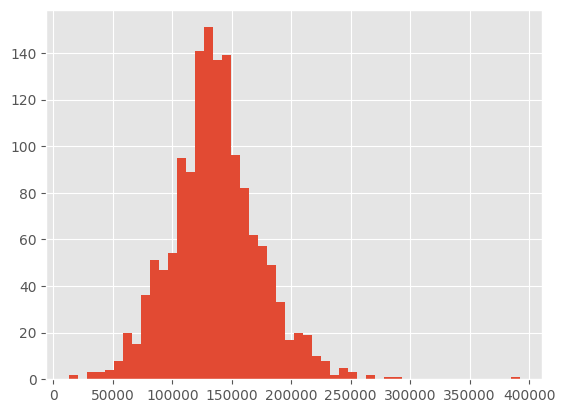

In [ ]:
plt.hist(x,bins=50)

(array([  2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,   0.,   1.,   1.,
          1.,   0.,   0.,   2.,   1.,   0.,   1.,   2.,   1.,   3.,   2.,
          3.,   6.,   2.,   9.,   7.,   2.,   6.,   6.,   7.,  23.,  17.,
         22.,  22.,  20.,  17.,  24.,  27.,  33.,  59.,  40.,  49.,  71.,
         76., 107.,  79.,  88.,  88.,  84.,  64.,  68.,  52.,  37.,  51.,
         38.,  33.,  23.,  19.,  17.,  15.,  10.,   8.,   2.,   5.,   2.,
          1.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([4.10683659, 4.12170108, 4.13656558, 4.15143007, 4.16629457,
        4.18115906, 4.19602356, 4.21088805, 4.22575255, 4.24061704,
        4.25548154, 4.27034603, 4.28521052, 4.30007502, 4.31493951,
        4.32980401, 4.3446685 , 4.359533  , 4.37439749, 4.38926199,
        4.40412648, 4.41899098, 4.43385547, 4.

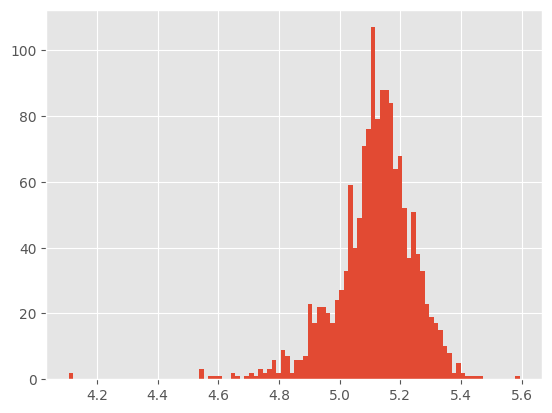

In [ ]:
plt.hist(np.log10(x),bins=100)

(array([  2.,   2.,  10.,  18.,  34.,  59., 112.,  95., 123., 151., 115.,
         96., 103.,  83.,  87.,  64.,  47.,  44.,  34.,  36.,  27.,  17.,
         15.,  20.,  11.,  14.,   9.,   4.,   6.,   6.,   4.,   3.,   1.,
          0.,   2.,   4.,   0.,   2.,   1.,   2.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.]),
 array([ 50000.,  64100.,  78200.,  92300., 106400., 120500., 134600.,
        148700., 162800., 176900., 191000., 205100., 219200., 233300.,
        247400., 261500., 275600., 289700., 303800., 317900., 332000.,
        346100., 360200., 374300., 388400., 402500., 416600., 430700.,
        444800., 458900., 473000., 487100., 501200., 515300., 529400.,
        543500., 557600., 571700., 585800., 599900., 614000., 628100.,
        642200., 656300., 670400., 684500., 698600., 712700., 726800.,
        740900., 755000.]),
 <BarContainer object of 50 artists>)

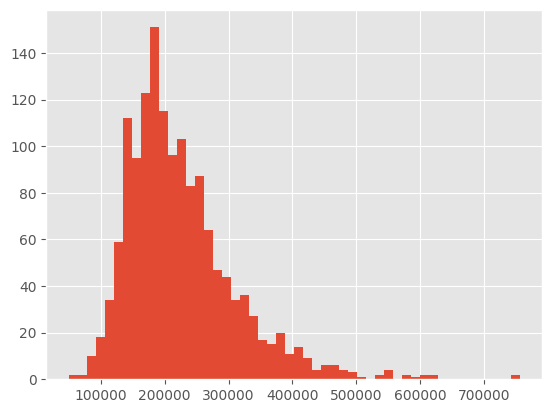

In [ ]:
plt.hist(y,bins=50)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  4.,  0.,  2.,  2.,  1.,  1.,  3.,  3.,  4.,
         6.,  2.,  5.,  4.,  9., 13.,  6., 11., 16., 21., 30., 41., 23.,
        24., 30., 24., 37., 24., 37., 45., 46., 52., 56., 47., 35., 53.,
        30., 52., 43., 43., 36., 54., 27., 37., 48., 25., 39., 30., 28.,
        17., 22., 25., 30., 13., 17., 12., 12., 11., 16.,  9., 11., 11.,
         8.,  2.,  6.,  5.,  6.,  2.,  4.,  0.,  0.,  2.,  4.,  0.,  2.,
         1.,  3.,  1.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([4.69897   , 4.71075977, 4.72254954, 4.73433931, 4.74612908,
        4.75791885, 4.76970862, 4.78149839, 4.79328816, 4.80507793,
        4.8168677 , 4.82865747, 4.84044724, 4.85223701, 4.86402678,
        4.87581655, 4.88760632, 4.89939609, 4.91118585, 4.92297562,
        4.93476539, 4.94655516, 4.95834493, 4.9701347 , 4.98192447,
        4.99371424, 5.00550401, 5.01729378, 5.02908355, 5.04087332,
        5.05266309, 5.0644

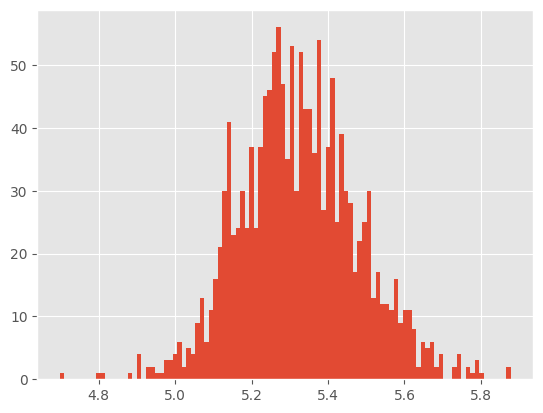

In [ ]:
plt.hist(np.log10(y),bins=100)

Проверка нормальности данных
----

In [ ]:
def two_histograms(x, y):
    """
    Функция, которая построит две гистограммы на одной картинке.
    Дополнительно пунктирными линиями указываются средние значения выборок.
    x: вектор pd.Series,
    y: вектор pd.Series
    """
    x.hist(alpha=0.5, bins=100, weights=[1./len(x)]*len(x))
    y.hist(alpha=0.5, bins=100, weights=[1./len(y)]*len(y))
    plt.axvline(x.mean(), color='red', alpha=0.8, linestyle='dashed')
    plt.axvline(y.mean(), color='blue', alpha=0.8, linestyle='dashed')
    plt.legend([x.name, y.name])

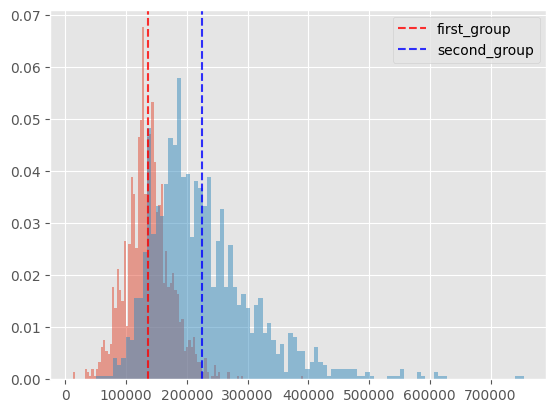

In [ ]:
# вызываем функцию для определённых выше векторов x, y.
two_histograms(x, y)

Если центр распределения медиана, используем критерий Манна - Уитни-
Вилкоксона или (редко) Moody's median критерий .


Если центр распределения среднее арифметическое, используем одну из
версий критерия Стьюдента.




Выбрать гипотезу для проверки.
Либо гипотезу о равенстве математических ожиданий или гипотезу о равенстве медиан.

Обосновать выбор.


Выберем гипотезу о равенстве среднего арифметического, так как распределения имеют выбросы, но не имеют отклонений от колоколообразности и явной асимметрии гистограмм

Критерием Флигнера-Килина проверим, равны ли дисперсии.

* Проверка гипотезы о равенстве дисперсий.<br>
H0: $\sigma_1 = \sigma_2$<br>
H1: $\sigma_1 \neq \sigma_2$<br>
Критерий Флингера-Килина [scipy.stats.fligner](https://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.stats.fligner.html).<br>

In [ ]:
res = stats.fligner(x, y)
print('p-value: ', res[1])

p-value:  2.4523557720679767e-96


Отвергаем гипотезу

Если оба распределения несущественно отличаются от нормального, то используем критерий Стьюдента

* Критерий согласия Стьюдента.<br>
H0: $\mu = M$<br>
H1: $\mu \ne M$<br>
[scipy.stats.ttest_1samp](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_1samp.html).<br>

Проверить гипотезу.
Проиллюстрировать результат ящиком с усами.


In [ ]:
res = stats.ttest_ind(x, y, equal_var=True)
print('p-value: ', res[1])

p-value:  1.8901777306505106e-236


Значение p-value меньше уровня значимости 0.05, поэтому гипотезу отвергаем

In [ ]:
AH1 = pd.read_csv('/content/sample_data/AmesHousing.txt', sep="\t", header = 0, index_col=False)
AH1['GroupByMedian'] = AH1['Gr Liv Area'].apply(lambda x: 'Area more than median' if x >= median else 'Area less than median')

In [ ]:
AH1

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,GroupByMedian
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,0,5,2010,WD,Normal,215000,Area more than median
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000,Area less than median
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000,Area less than median
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,4,2010,WD,Normal,244000,Area more than median
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900,Area more than median
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500,Area less than median
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000,Area less than median
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000,Area less than median
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,4,2006,WD,Normal,170000,Area less than median


Text(0.5, 1.0, 'Цена в зависимости от жил площади')

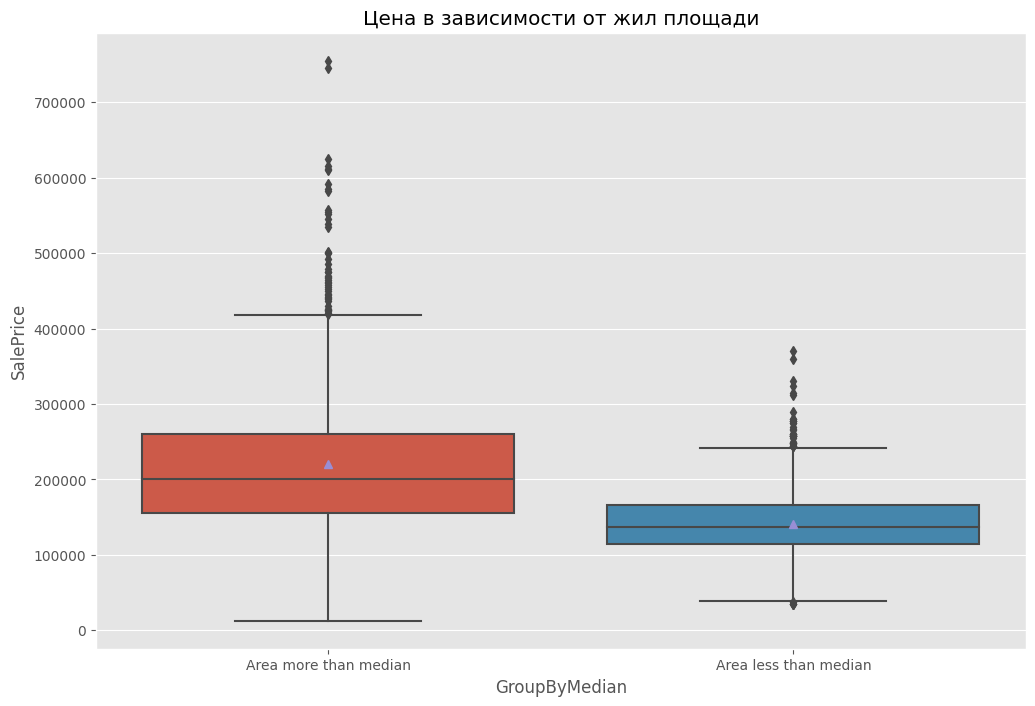

In [ ]:
#  Ящики с усами
var = 'GroupByMedian'
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=AH1[var], y=AH1['SalePrice'], showmeans=True)
#fig.axis(ymin=0, ymax=800000);
#plt.xticks(rotation=90);

plt.title(u'Цена в зависимости от жил площади')


Самостоятельно выбрать две переменные,
то есть сравнение производим ДВАЖДЫ, для двух разных переменных.
В качестве группирующей переменной нельзя использовать переменные
SalePrice и Gr Liv Area.

Condition of sale, Year Sold

In [ ]:
AH1 = pd.read_csv('/content/sample_data/AmesHousing.txt', sep="\t", header = 0, index_col=False)
AH1=AH1[['Lot Area', 'Garage Area']]
median1 = AH1['Garage Area'].median()
median1

480.0

In [ ]:
x1 = AH1[AH1['Garage Area']  < median1]['Lot Area']
y1 = AH1[AH1['Garage Area'] >= median1]['Lot Area']
x1.name, y1.name = 'first_group', 'second_group'

In [ ]:
x1

2       14267
5        9978
9        7500
10      10000
11       7980
        ...  
2918     1526
2919     1936
2920     1894
2927    10441
2928    10010
Name: first_group, Length: 1459, dtype: int64

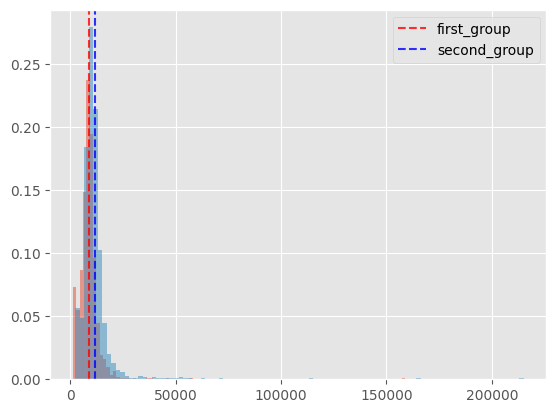

In [ ]:
two_histograms(x1, y1)

(array([141., 128., 355., 479., 212.,  69.,  33.,  15.,   9.,   7.,   2.,
          2.,   1.,   1.,   0.,   1.,   1.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.]),
 array([  1300.        ,   3552.85714286,   5805.71428571,   8058.57142857,
         10311.42857143,  12564.28571429,  14817.14285714,  17070.        ,
         19322.85714286,  21575.71428571,  23828.57142857,  26081.42857143,
         28334.28571429,  30587.14285714,  32840.        ,  35092.85714286,
         37345.71428571,  39598.57142857,  41851.42857143,  44104.28571429,
         46357.14285714,  48610.        ,  50862.85714286,  53115.71428571,
         55368.57142857,  57621.42857143,  59874.28571429,  62127.

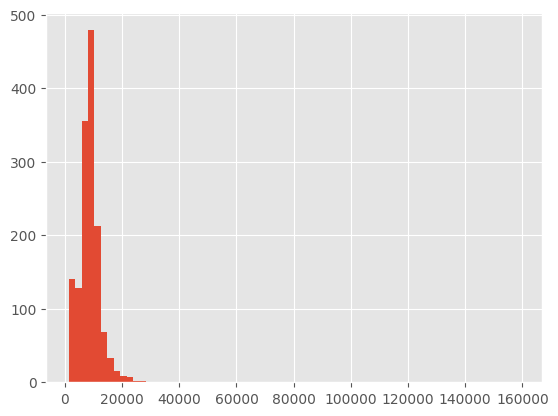

In [ ]:
plt.hist(x1,bins=70)

(array([  1.,   0.,   8.,   7.,   3.,  20.,   1.,  10.,   8.,   2.,  10.,
         17.,   5.,   8.,   6.,   1.,   2.,  11.,  14.,   4.,   3.,  10.,
          3.,  10.,   6.,  27.,   3.,  11.,  17.,  20.,  18.,  49.,  43.,
         23.,  31.,  74.,  57.,  85.,  92.,  87.,  92., 115.,  86.,  62.,
         63.,  50.,  34.,  24.,  26.,  22.,   5.,  18.,  11.,   7.,   8.,
          2.,   4.,   2.,   9.,   0.,   2.,   1.,   1.,   1.,   0.,   1.,
          1.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([3.11394335, 3.13481789, 3.15569243, 3.17656697, 3.1974415 ,
        3.21831604, 3.23919058, 3.26006512, 3.28093965, 3.30181419,
        3.32268873, 3.34356327, 3.3644378 , 3.38531234, 3.40618688,
        3.42706142, 3.44793596, 3.46881049, 3.48968503, 3.51055957,
        3.53143411, 3.55230864, 3.57318318, 3.

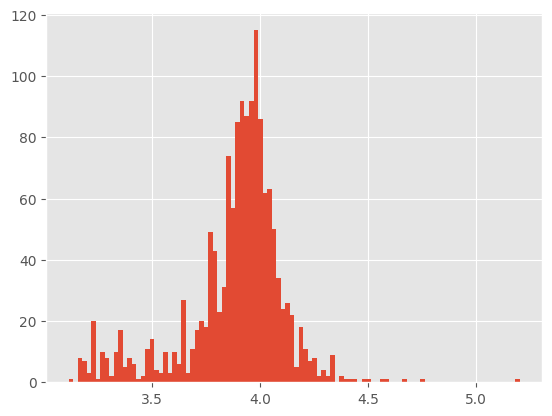

In [ ]:
plt.hist(np.log10(x1),bins=100)

(array([154., 681., 466.,  96.,  30.,  13.,   3.,   7.,   3.,   2.,   3.,
          5.,   2.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  2403.  ,   6659.84,  10916.68,  15173.52,  19430.36,  23687.2 ,
         27944.04,  32200.88,  36457.72,  40714.56,  44971.4 ,  49228.24,
         53485.08,  57741.92,  61998.76,  66255.6 ,  70512.44,  74769.28,
         79026.12,  83282.96,  87539.8 ,  91796.64,  96053.48, 100310.32,
        104567.16, 108824.  , 113080.84, 117337.68, 121594.52, 125851.36,
        130108.2 , 134365.04, 138621.88, 142878.72, 147135.56, 151392.4 ,
        155649.24, 159906.08, 164162.92, 168419.76, 172676.6 , 176933.44,
        181190.28, 185447.12, 189703.96, 193960.8 , 198217.64, 202474.48,
        206731.32, 210988.16, 215245.  ]),
 <BarContainer object o

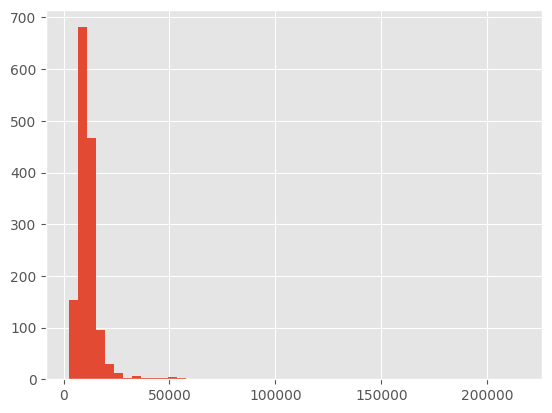

In [ ]:
plt.hist(y1,bins=50)

(array([  1.,   5.,   5.,   0.,   2.,   0.,   6.,   2.,   2.,  15.,  20.,
         13.,   7.,   5.,   5.,   6.,   9.,   7.,   3.,   6.,  12.,  18.,
          5.,  27.,  49.,  31.,  39.,  63.,  76.,  80.,  90.,  68.,  95.,
        106.,  73.,  84.,  76.,  63.,  55.,  41.,  31.,  26.,  22.,  18.,
         18.,   9.,   6.,  10.,   8.,   5.,   5.,   3.,   5.,   3.,   1.,
          1.,   0.,   3.,   3.,   2.,   1.,   0.,   3.,   1.,   1.,   1.,
          2.,   2.,   3.,   1.,   1.,   0.,   1.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          1.]),
 array([3.38075377, 3.40027556, 3.41979736, 3.43931915, 3.45884094,
        3.47836274, 3.49788453, 3.51740632, 3.53692811, 3.55644991,
        3.5759717 , 3.59549349, 3.61501529, 3.63453708, 3.65405887,
        3.67358067, 3.69310246, 3.71262425, 3.73214604, 3.75166784,
        3.77118963, 3.79071142, 3.81023322, 3.

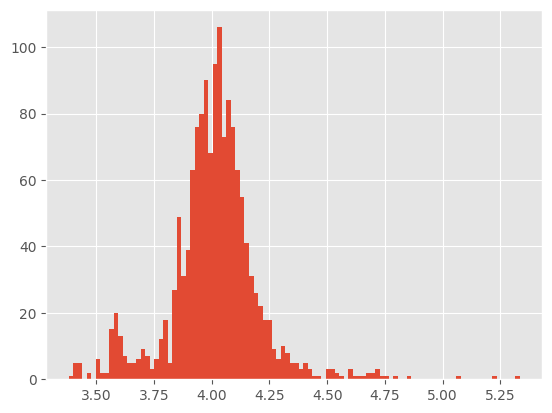

In [ ]:
plt.hist(np.log10(y1),bins=100)

Распределения ненормальные, так как есть выбросы! К ним относимся строго
Хотя отклонения от симметрии незначительные

In [ ]:
res = stats.fligner(x, y)
print('p-value: ', res[1])

p-value:  2.4523557720679767e-96


Гипотезу о равентсве дисперсий не принимаем

В распределении есть очевидные выбросы, которые не дают применить критерий Стюдента. Тогда можно поробовать применить непараметрические критерии. Критерий Уилкоксона применим только для парных выборок. У нас же в разных выборках находятся разные объекты. Поэтому нам остаётся критерий Манна-Уитни.

In [ ]:
res1 = stats.mannwhitneyu(x1, y1)
print('p-value:', res1[1])

p-value: 7.12269629399755e-62


Гипотеза отвергается

In [ ]:
AH1 = pd.read_csv('/content/sample_data/AmesHousing.txt', sep="\t", header = 0, index_col=False)
AH1['GroupByMedian'] = AH1['Garage Area'].apply(lambda x: 'Area more than median' if x >= median1 else 'Area less than median')

Text(0.5, 1.0, 'Плошадь гаража в зависимости от общей площади')

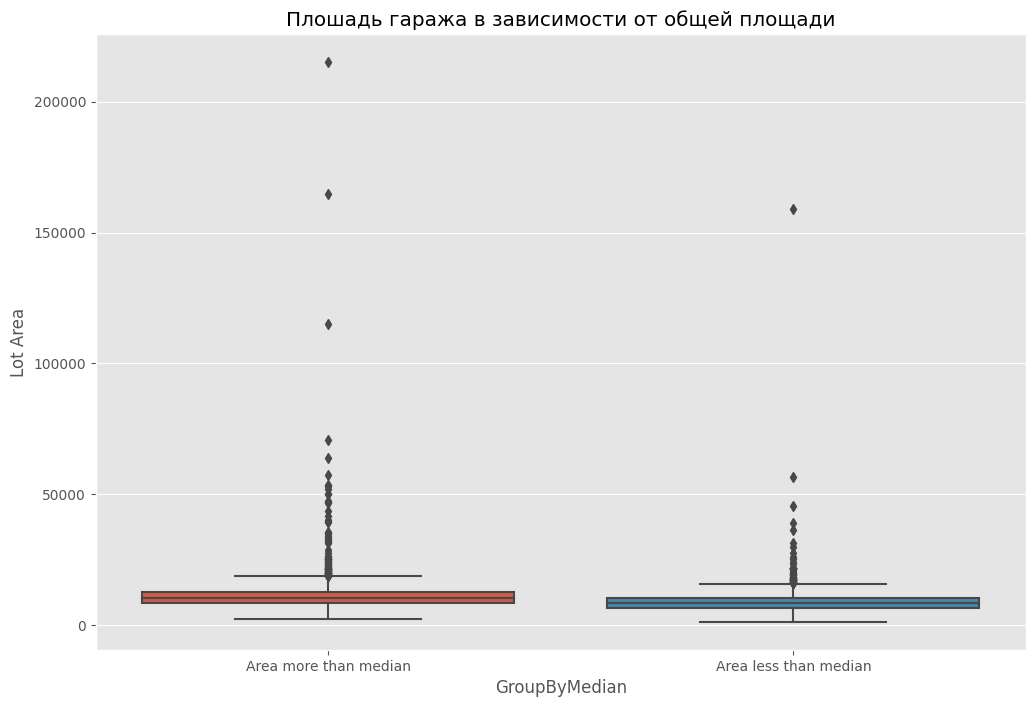

In [ ]:
#  Ящики с усами
var2 = 'GroupByMedian'
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=AH1[var2], y=AH1['Lot Area'])
#fig.axis(ymin=0, ymax=800000);
#plt.xticks(rotation=90);

plt.title(u'Плошадь гаража в зависимости от общей площади')